# Titanic Kaggle Competition

Hi! In this notebook we'll work on the titanic kaggle competition. The data and more details regarding the competition can be [found here](https://www.kaggle.com/c/titanic/overview). 

Let's start off by importing some packages we will use for data analysis.

In [2128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

Here we import the train and test data. For exploratory data analysis, we'll use the training data. I also create an all_data dataframe, so that when we feature engineer both the train and test datasets will change.

In [2129]:
# reading in training data
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2130]:
# reading in test data
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2131]:
train_data["train_test"] = 1
test_data["train_test"] = 0

test_data["Survived"] = np.NaN
all_data = pd.concat([train_data, test_data])

all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# Exploratory Data Analysis

We'll start off by exploring the data and understanding the relationships between different features.


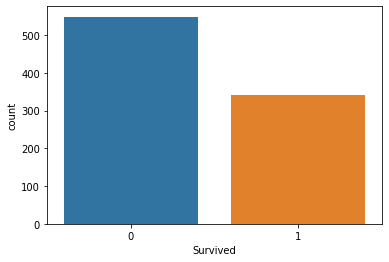

In [2132]:
# checking if data is balanced 
sns.countplot(x="Survived", data=train_data);

In [2133]:
# understanding null, categorical and continuous values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


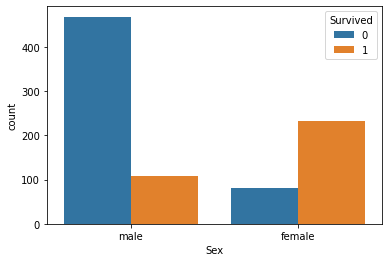

In [2134]:
# exploring relationship between sex and survived
sns.countplot(x="Sex", data=train_data, hue="Survived");

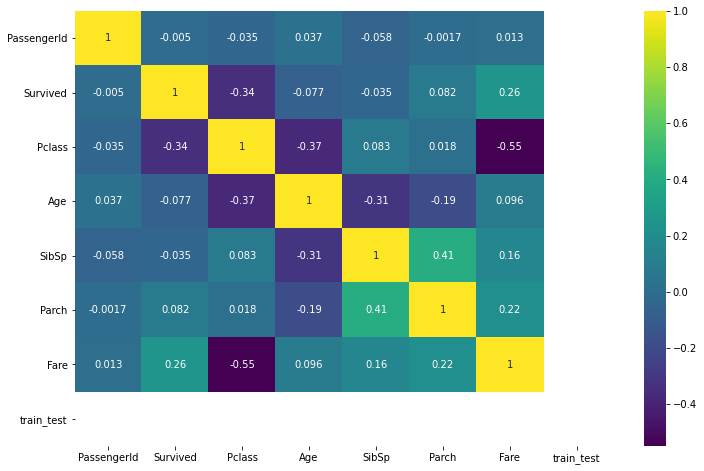

In [2135]:
# drawing heatmap to explore correlations
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, cmap="viridis");

From the heatmap above, I noticed there was some correlation between pclass and fare. So, we'll explore this further.

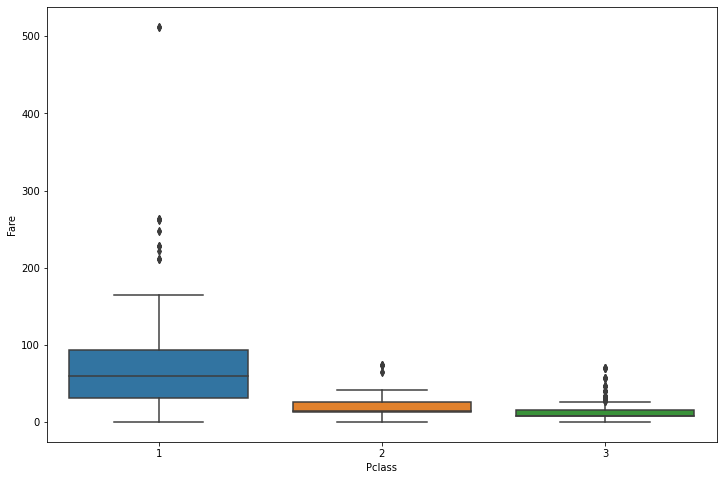

In [2136]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Pclass", y="Fare", data=train_data);

In [2137]:
train_data.groupby("Pclass").describe()["Fare"]

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [2138]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

Now, we'll explore some of the categorical variables and their relationship with survived.

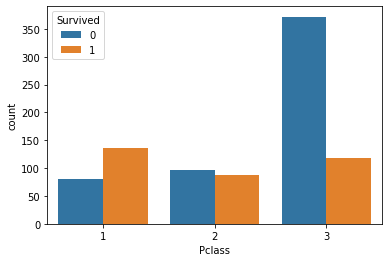

In [2139]:
sns.countplot(x="Pclass", data=train_data, hue="Survived");

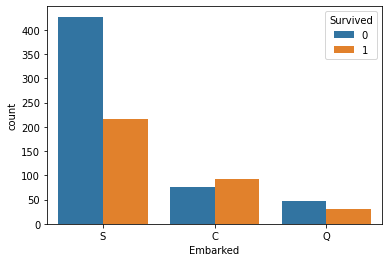

In [2140]:
sns.countplot(x="Embarked", data=train_data, hue="Survived");

Based on the graph, it's not clear whether or not a certain location means there is a higher chance of survival.

To address this, let's find the percentage of people survived for each embarked class.

In [2141]:
total_emb = train_data.groupby("Embarked")["Survived"].count()
sur_emb = train_data[train_data["Survived"] == 1].groupby("Embarked")["Survived"].count()

In [2142]:
per_emb = sur_emb / total_emb * 100
per_emb

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

Now, that's a lot more clear, and we can see that half the people who left from Cherbourg survived!

Now let's explore the continuous variables.

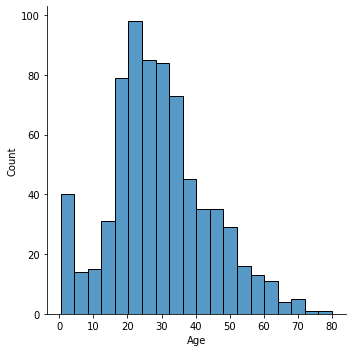

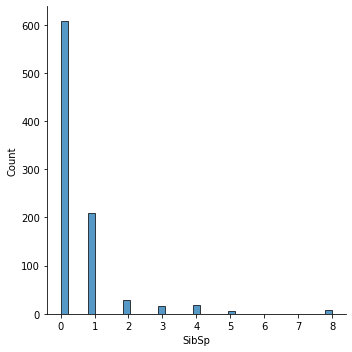

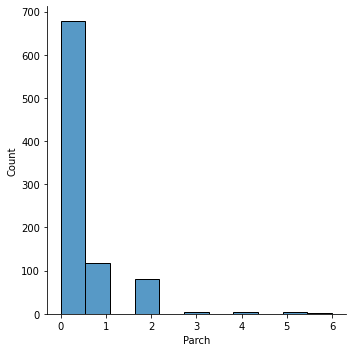

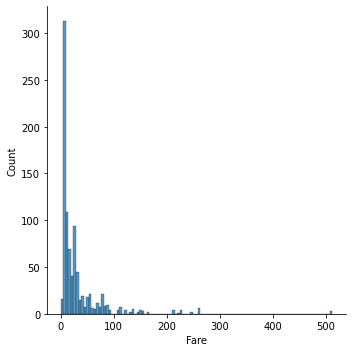

In [2143]:
for feature in num_var:
  sns.displot(train_data[feature], kde=False)
  plt.show()

I also want to draw a countplot for parch and sibsp to see if there is a relationship with survived.

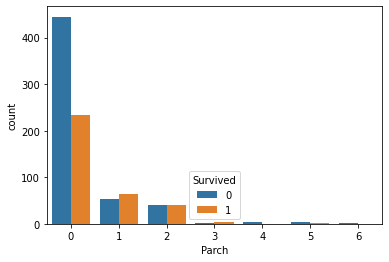

In [2144]:
sns.countplot(x="Parch", data=train_data, hue="Survived");

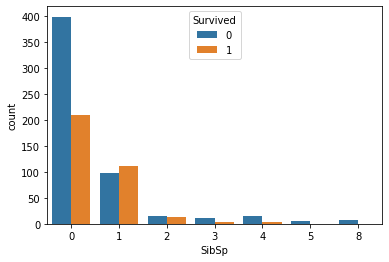

In [2145]:
sns.countplot(x="SibSp", data=train_data, hue="Survived");

Before finishing of data analysis, I quickly want to check if any of the variables are correlated with survived. 

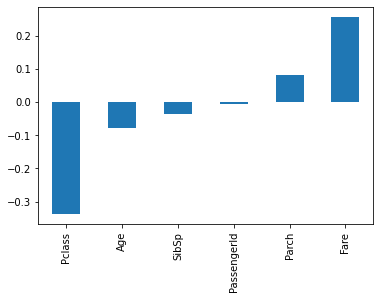

In [2146]:
train_data.corr()["Survived"].sort_values().drop(["train_test", "Survived"]).plot(kind="bar");

There is some correlation between fare and survived, so let's explore this!

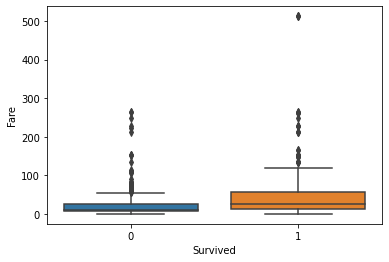

In [2147]:
sns.boxplot(x="Survived", y="Fare", data=train_data );

In [2148]:
train_data.groupby("Survived")["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


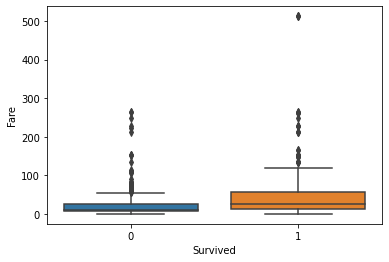

In [2149]:
sns.boxplot(x="Survived", y="Fare", data=train_data );

# Data Preprocessing - Dealing with Missing Data

Now, we'll clean up the data and deal with the missing data. 

In [2150]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64

For a better representation of the null values, let's see what percentage of these values are missing for each feature.

In [2151]:
all_data.isnull().sum() / len(all_data) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
train_test      0.000000
dtype: float64

First, we'll deal with cabin as a huge chunk of the data is missing.

Rather than dropping the entire feature, we'll extract two features from it - cabin number and letter.


In [2152]:
all_data["Cabin_num"] = all_data["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))


In [2153]:
cabin_num_sur = all_data.groupby("Cabin_num")["Survived"].sum()
cabin_num_total = all_data.groupby("Cabin_num")["Survived"].count()
cabin_num_per = cabin_num_sur / cabin_num_total * 100
cabin_num_per

Cabin_num
0     29.985444
1     67.777778
2     56.250000
3     50.000000
4    100.000000
Name: Survived, dtype: float64

In [2154]:
all_data["Cabin_letter"] = all_data["Cabin"].apply(lambda x: "n" if pd.isna(x) else str(x[0]))

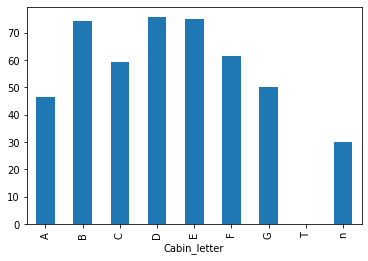

In [2155]:
cabin_letter_sur = all_data.groupby("Cabin_letter")["Survived"].sum()
cabin_letter_total = all_data.groupby("Cabin_letter")["Survived"].count()
cabin_letter_per = cabin_letter_sur / cabin_letter_total * 100
cabin_letter_per.plot(kind="bar");

In [2156]:
all_data = all_data.drop("Cabin", axis=1)

In [2157]:
all_data.isnull().sum() / len(all_data) * 100

PassengerId      0.000000
Survived        31.932773
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age             20.091673
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.076394
Embarked         0.152788
train_test       0.000000
Cabin_num        0.000000
Cabin_letter     0.000000
dtype: float64

Now, we've created two more features and dropped cabin. Next, we'll focus on filling in the age values. 

To do so, we'll fill in the values based on the pclass of the data. For each pclass, we will take the average age and fill it in with the missing values in the age column.

The reason we are using pclass to determine what values to fill in age with is because there is some correlation between the two features (from heatmap above).

In [2158]:
pclass_age = all_data.groupby("Pclass")["Age"].mean()
pclass_age

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [2159]:
def pclass_age_fun(pclass, age):
  if pd.isna(age):
    return pclass_age[pclass]
  else:
    return age

In [2160]:
all_data["Age"] = all_data.apply(lambda x: pclass_age_fun(x["Pclass"], x["Age"]), axis=1)

In [2161]:
all_data.isnull().sum() / len(all_data) * 100

PassengerId      0.000000
Survived        31.932773
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.000000
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.076394
Embarked         0.152788
train_test       0.000000
Cabin_num        0.000000
Cabin_letter     0.000000
dtype: float64

Now, there are two features left to deal with - fare and embarked. For embarked, all the missing values are in the training set, therefore, we'll drop the rows that have a missing value.

The reason we are not dealing with the survived feature is because we set those values to be null when we concatenated the train and test data above!

In [2162]:
all_data = all_data.dropna(subset=["Embarked"])

In [2163]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
train_test       0
Survived       418
dtype: int64

Now, we have to deal with the single missing value from Fare. We did not drop this value since it is in the test set, and the competition states to not drop any of the test values. 

Instead, we will fill in this value with the average Fare.

In [2164]:
all_data["Fare"] = all_data["Fare"].fillna(all_data["Fare"].mean())

In [2165]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
train_test        0
Cabin_num         0
Cabin_letter      0
dtype: int64

The data is now all filled!

In [2166]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,Cabin_num,Cabin_letter
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,n
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,n
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,n


# Data Preprocessing - Feature Engineering

The last thing we need to do before training our model is to feature engineer and deal with the categorical variables.

In [2167]:
all_data.select_dtypes(["object"]).columns

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Cabin_letter'], dtype='object')

Let's first extract the title from the name column.

In [2168]:
all_data['Title'] = all_data["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data["Title"].value_counts()

Mr              757
Miss            259
Mrs             196
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Mme               1
Dona              1
Lady              1
Jonkheer          1
Capt              1
Sir               1
Don               1
the Countess      1
Name: Title, dtype: int64

It's evident that there are a bunch of categories, but a majority of them just have a couple people. Let's create an "other" column. 

In [2169]:
all_data["Title"] = all_data["Title"].replace(["Rev", "Dr", "Col", "Major", "Ms", "Mlle", "Mme", "Dona", "Lady", "Jonkheer", "Capt", "Sir", "Don", "the Countess"], "OTHER")

In [2170]:
all_data = all_data.drop("Name", axis=1)

Let's deal with the ticket now. This time we'll create a new column called "ticket_num" which will indicate if a ticket is made up of all numbers or not.

In [2171]:
all_data["Ticket_num"] = all_data["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0)

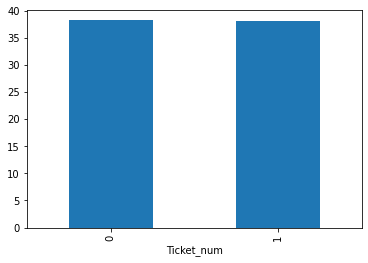

In [2172]:
ticket_num_sur = all_data.groupby("Ticket_num")["Survived"].sum()
ticket_num_total = all_data.groupby("Ticket_num")["Survived"].count()
ticket_num_per = ticket_num_sur / ticket_num_total * 100
ticket_num_per.plot(kind="bar");

It's clear that it does not really matter if a ticket is a numbered ticket or not. So, let's just drop this column.

In [2173]:
# Just drop ticket and ticket_num
all_data = all_data.drop(["Ticket", "Ticket_num"], axis=1)
all_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,Cabin_num,Cabin_letter,Title
0,1,0.0,3,male,22.000000,1,0,7.2500,S,1,0,n,Mr
1,2,1.0,1,female,38.000000,1,0,71.2833,C,1,1,C,Mrs
2,3,1.0,3,female,26.000000,0,0,7.9250,S,1,0,n,Miss
3,4,1.0,1,female,35.000000,1,0,53.1000,S,1,1,C,Mrs
4,5,0.0,3,male,35.000000,0,0,8.0500,S,1,0,n,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,24.816367,0,0,8.0500,S,0,0,n,Mr
414,1306,NaN,1,female,39.000000,0,0,108.9000,C,0,1,C,OTHER
415,1307,NaN,3,male,38.500000,0,0,7.2500,S,0,0,n,Mr
416,1308,NaN,3,male,24.816367,0,0,8.0500,S,0,0,n,Mr


Now, let's deal with the remaining categorical columns. We will one hot encode the columns.

In [2174]:
dummies = pd.get_dummies(all_data[["Sex", "Embarked", "Cabin_letter", "Title"]], drop_first=True)
all_data = pd.concat([all_data.drop(["Sex", "Embarked", "Cabin_letter", "Title"], axis=1), dummies], axis=1)

In [2175]:
all_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test,Cabin_num,Sex_male,Embarked_Q,Embarked_S,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_T,Cabin_letter_n,Title_Miss,Title_Mr,Title_Mrs,Title_OTHER
0,1,0.0,3,22.000000,1,0,7.2500,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,2,1.0,1,38.000000,1,0,71.2833,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,3,1.0,3,26.000000,0,0,7.9250,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
3,4,1.0,1,35.000000,1,0,53.1000,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,5,0.0,3,35.000000,0,0,8.0500,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,24.816367,0,0,8.0500,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
414,1306,NaN,1,39.000000,0,0,108.9000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
415,1307,NaN,3,38.500000,0,0,7.2500,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
416,1308,NaN,3,24.816367,0,0,8.0500,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0


In [2176]:
all_data.select_dtypes(["object"]).columns

Index([], dtype='object')

All data preprocessing is done!

Now, let's split the data back into train and test datasets so that we can input them into the model.

In [2177]:
X_train = all_data[all_data["train_test"] == 1].drop(["Survived", "PassengerId"], axis=1)
X_test = all_data[all_data["train_test"] == 0].drop(["Survived", "PassengerId"], axis=1)

In [2178]:
X_train.shape

(889, 22)

In [2179]:
X_test.shape

(418, 22)

In [2180]:
y_train = all_data[all_data["train_test"] == 1]["Survived"]
y_train.shape

(889,)

# Scaling data

Before trying out some models, let's scale the data so that training will be easier. We'll use MinMaxScaler from scikit-learn.


In [2181]:
from sklearn.preprocessing import MinMaxScaler

In [2182]:
scaler = MinMaxScaler()

In [2183]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2184]:
X_train.shape

(889, 22)

In [2185]:
X_test.shape

(418, 22)

# Model Building

Now, we'll try out different models from the scikit-learn library and see which one works the best for this problem. 


In [2186]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2187]:
# Implemented cross validation for better accuracy predictions

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg_cv = cross_val_score(logreg,X_train,y_train,cv=5)
logreg_cv_mean = round(logreg_cv.mean() * 100, 2)

print(logreg_cv_mean)

82.34


In [2188]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)


dectree_cv = cross_val_score(dectree,X_train,y_train,cv=5)
dectree_cv_mean = round(dectree_cv.mean() * 100, 2)

print(dectree_cv_mean)

78.63


In [2189]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


knn_cv = cross_val_score(knn, X_train, y_train, cv=5)
knn_cv_mean = round(knn_cv.mean() * 100, 2)

print(knn_cv_mean)

80.66


In [2190]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


rf_cv = cross_val_score(rf,X_train,y_train,cv=5)
rf_cv_mean = round(rf_cv.mean() * 100, 2)

print(rf_cv_mean)

80.66


In [2191]:
svc = SVC(probability = True)
svc.fit(X_train, y_train)


svc_cv = cross_val_score(svc,X_train,y_train,cv=5)
svc_cv_mean = round(svc_cv.mean() * 100, 2)

print(svc_cv_mean)

81.67


In [2192]:
models = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "KNN", "Random Forest", "SVC"],
    "Score": [logreg_cv_mean, dectree_cv_mean, knn_cv_mean, rf_cv_mean, svc_cv_mean]
})
models.sort_values("Score", ascending=False)


,Model,Score
0,Logistic Regression,82.34
4,SVC,81.67
2,KNN,80.66
3,Random Forest,80.66
1,Decision Tree,78.63


So it's clear that logistic regression worked the best for our problem! 

Just to satisfy my curiosity, let's try making a neural network using tensorflow (will be subject to overfitting since we don't have the test predictions to use for validation data)!

In [2193]:
# Trying out a neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2194]:
model = Sequential()

model.add(Dense(22, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [2195]:
model.fit(X_train, y_train, epochs=400, batch_size=256)

Epoch 1/400
4/4 [==============================] - 1s 4ms/step - loss: 0.7050 - accuracy: 0.4589
Epoch 2/400
4/4 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5062
Epoch 3/400
4/4 [==============================] - 0s 5ms/step - loss: 0.6755 - accuracy: 0.5951
Epoch 4/400
4/4 [==============================] - 0s 4ms/step - loss: 0.6686 - accuracy: 0.6063
Epoch 5/400
4/4 [==============================] - 0s 5ms/step - loss: 0.6567 - accuracy: 0.6558
Epoch 6/400
4/4 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.6727
Epoch 7/400
4/4 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.6749
Epoch 8/400
4/4 [==============================] - 0s 5ms/step - loss: 0.6333 - accuracy: 0.6929
Epoch 9/400
4/4 [==============================] - 0s 4ms/step - loss: 0.6148 - accuracy: 0.7267
Epoch 10/400
4/4 [==============================] - 0s 5ms/step - loss: 0.6115 - accuracy: 0.7199
Epoch 11/400
4/4 [===========

In [2196]:
metrics = pd.DataFrame(model.history.history)

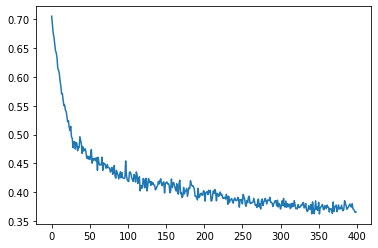

In [2197]:
metrics["loss"].plot();

# Evaluating Model Performance

So, we've implemented several different models, and it's evident that logistic regression performed the best (neural network most likely overfit).

Let's further evaluate the model's performance using a classification report and a confusion matrix. This will be done on the train dataset, since the test dataset y values are not given.

In [2198]:
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_train)

In [2199]:
from sklearn.metrics import classification_report,confusion_matrix

We will first create a classification report to understand the model's precision and recall. The f1-score is a nice metric which gives an overall score of the precision and recall.

In [2200]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       549
         1.0       0.80      0.77      0.78       340

    accuracy                           0.84       889
   macro avg       0.83      0.82      0.82       889
weighted avg       0.83      0.84      0.84       889



We will also create a confusion matrix to understand how the model makes predictions (true positives, false positives, true negatives, false negatives).

In [2201]:
confusion_matrix(y_train, predictions)

array([[482,  67],
       [ 79, 261]])

# Final Submission

Now, it's time to format the output for submitting!

First, let's predict on the test set.

In [2202]:
logreg_predictions = logreg.predict(X_test).astype(int)
dectree_predictions = dectree.predict(X_test).astype(int)
knn_predictions = knn.predict(X_test).astype(int)
rf_predictions = rf.predict(X_test).astype(int)
svc_predictions = svc.predict(X_test).astype(int)
nn_predictions = (model.predict(X_test) > 0.5).astype("int32").reshape(-1)

In [2203]:
logreg_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Now, let's format the output, so that the passenger id is included in the submission (required).

In [2204]:
# formatting output
final_data_1 = {'PassengerId': test_data.PassengerId, 'Survived': logreg_predictions}
submission_1 = pd.DataFrame(data=final_data_1)

final_data_2 = {'PassengerId': test_data.PassengerId, 'Survived': dectree_predictions}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test_data.PassengerId, 'Survived': knn_predictions}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test_data.PassengerId, 'Survived': rf_predictions}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test_data.PassengerId, 'Survived': svc_predictions}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_6 = {'PassengerId': test_data.PassengerId, 'Survived': nn_predictions}
submission_6 = pd.DataFrame(data=final_data_6)


Finally, let's convert the dataframes to csv files.

In [2205]:
# creating submission files 
submission_1.to_csv('output/submission_logreg.csv', index =False)
submission_2.to_csv('output/submission_dectree.csv',index=False)
submission_3.to_csv('output/submission_knn.csv', index=False)
submission_4.to_csv('output/submission_rf.csv', index=False)
submission_5.to_csv('output/submission_svc.csv', index=False)
submission_6.to_csv('output/submission_nn.csv', index=False)

For further improving the model, gridsearchcv from scikit-learn can be used to find the ideal parameters. Also, further feature engineering could be done to extract better features. 

You've reached the end of this notebook! Thanks for reading!